<a href="https://colab.research.google.com/github/harshnavadiya/dsmltrainer/blob/master/assignment_2/Module_4_7_Advanced_Python_Pandas_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

In [22]:
!wget -O "EnergyIndicators.xlsx" "https://drive.google.com/open?id=1TZTIY43j_jLZD3bCBWednfN43cjE1DgH"
!ls

--2019-06-09 05:07:38--  https://drive.google.com/open?id=1TZTIY43j_jLZD3bCBWednfN43cjE1DgH
Resolving drive.google.com (drive.google.com)... 172.217.193.139, 172.217.193.113, 172.217.193.102, ...
Connecting to drive.google.com (drive.google.com)|172.217.193.139|:443... connected.
HTTP request sent, awaiting response... 307 OK
Location: https://drive.google.com/file/d/1TZTIY43j_jLZD3bCBWednfN43cjE1DgH/view?usp=drive_open [following]
--2019-06-09 05:07:38--  https://drive.google.com/file/d/1TZTIY43j_jLZD3bCBWednfN43cjE1DgH/view?usp=drive_open
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘EnergyIndicators.xlsx’

EnergyIndicators.xl     [ <=>                ] 120.81K  --.-KB/s    in 0.01s   

2019-06-09 05:07:38 (10.0 MB/s) - ‘EnergyIndicators.xlsx’ saved [123706]

EnergyIndicators.xls  EnergyIndicators.xlsx  sample_data


In [0]:
from google.colab import files
files.upload()


In [25]:
!ls

Energy+Indicators.xls  EnergyIndicators.xls  EnergyIndicators.xlsx  sample_data


In [0]:
# error:- Unsupported format, or corrupt file: Expected BOF record; found b'<!DOCTYP
# solution:-
#add file in your pc by this link :- https://drive.google.com/open?id=1TZTIY43j_jLZD3bCBWednfN43cjE1DgH
from google.colab import files
files.upload()

In [0]:
!ls

Load the energy data from the file Energy Indicators.xls, which is a list of indicators of energy supply and renewable electricity production from the United Nations for the year 2013, and should be put into a DataFrame with the variable name of energy.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

Convert Energy Supply to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as np.NaN values.

Rename the following list of countries (for use in later questions):

"Republic of Korea": "South Korea", "United States of America": "United States", "United Kingdom of Great Britain and Northern Ireland": "United Kingdom", "China, Hong Kong Special Administrative Region": "Hong Kong"

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these,

e.g.

'Bolivia (Plurinational State of)' should be 'Bolivia',

'Switzerland17' should be 'Switzerland'.

In [0]:
import pandas as pd
import numpy as np

df = pd.read_excel('Energy+Indicators.xls',usecols =[2,3,4,5])

              
row_start=17
energy = df.loc[row_start:243]
energy.columns = ['Country', 'Energy Supply(Petajoules)', 'Energy Supply per Capita(Gigajoules)', '% Renewable']
# energy=pd.DataFrame(energy)
energy=energy.set_index("Country")
energy=energy.replace('...', np.nan, regex=True)
energy["Energy Supply(gigajoules)"]=1000000*energy['Energy Supply(Petajoules)']
energy=energy.rename(index={"Republic of Korea": "South Korea", 
                            "United States of America":"United States", 
                            "United Kingdom of Great Britain and Northern Ireland": "United Kingdom", 
                            "China, Hong Kong Special Administrative Region": "Hong Kong",
                           'Bolivia (Plurinational State of)':'Bolivia',
                            'Switzerland17':'Switzerland',
                            "Australia1":"Australia",
                            "Ukraine18":"Ukraine",
                            "United Kingdom of Great Britain and Northern Ireland19":"United Kingdom of Great Britain and Northern Ireland",
                           "United States of America20":"United States of America",
                            "Venezuela (Bolivarian Republic of)":"Venezuela"})
energy

Next, load the GDP data from the file world_bank.csv, which is a csv containing countries' GDP from 1960 to 2015 from World Bank. Call this DataFrame GDP.

Make sure to skip the header, and rename the following list of countries:

"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran", "Hong Kong SAR, China": "Hong Kong"

In [136]:
GDP = pd.read_csv('world_bank.csv',skiprows=4)
GDP['Country Name']=GDP['Country Name'].replace({"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran", "Hong Kong SAR, China": "Hong Kong"})
GDP = GDP[['Country Name','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]
GDP.columns = ['Country','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
GDP.head()

,Country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,2.424581e+09,2.615084e+09,2.745251e+09,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09
1,Afghanistan,6.971286e+09,9.747880e+09,1.010923e+10,1.243909e+10,1.585657e+10,1.780429e+10,1.990732e+10,2.056107e+10,2.048489e+10,1.990711e+10
2,Angola,5.238101e+10,6.526645e+10,8.853861e+10,7.030716e+10,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11
3,Albania,8.896073e+09,1.067732e+10,1.288135e+10,1.204421e+10,1.192696e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322825e+10,1.138693e+10
4,Andorra,3.543257e+09,4.016972e+09,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09


Finally, load the Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology from the file scimagojr-3.xlsx, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame ScimEn.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15).

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

This function should return a DataFrame with 20 columns and 15 entries.

In [144]:
sci=pd.read_excel('scimagojr.xlsx')
join = sci[:15].merge(energy,how='inner',left_on='Country',right_on='Country')
last_join = join.merge(GDP,how='inner',left_on='Country',right_on='Country')
last_join = last_join.set_index('Country')
last_join

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply(Petajoules),Energy Supply per Capita(Gigajoules),% Renewable,Energy Supply(gigajoules),2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,,
India,5,32064,31167,268746,87658,8.38,153,33195.0,26.0,14.969080,3.319500e+10,9.402599e+11,1.216735e+12,1.198895e+12,1.341887e+12,1.675615e+12,1.823050e+12,1.827638e+12,1.856722e+12,2.039127e+12,2.103588e+12
Germany,6,27966,27370,278237,59495,9.95,166,13261.0,165.0,17.901530,1.326100e+10,3.002446e+12,3.439953e+12,3.752366e+12,3.418005e+12,3.417095e+12,3.757698e+12,3.543984e+12,3.752514e+12,3.898727e+12,3.381389e+12
Russian Federation,7,26435,26196,68424,29544,2.59,75,30709.0,214.0,17.288680,3.070900e+10,9.899305e+11,1.299706e+12,1.660846e+12,1.222644e+12,1.524917e+12,2.051662e+12,2.210257e+12,2.297128e+12,2.063663e+12,1.363705e+12
Canada,8,26148,25571,395467,74112,15.12,193,10431.0,296.0,61.945430,1.043100e+10,1.315415e+12,1.464977e+12,1.549131e+12,1.371153e+12,1.613464e+12,1.788648e+12,1.824289e+12,1.842628e+12,1.799269e+12,1.552522e+12
South Korea,11,18217,17994,208150,39811,11.43,132,11007.0,221.0,2.279353,1.100700e+10,1.011797e+12,1.122679e+12,1.002219e+12,9.019350e+11,1.094499e+12,1.202464e+12,1.222807e+12,1.305605e+12,1.411334e+12,1.382764e+12
Brazil,13,15332,15132,118483,28818,7.73,109,12149.0,59.0,69.648030,1.214900e+10,1.107640e+12,1.397084e+12,1.695825e+12,1.667020e+12,2.208872e+12,2.616202e+12,2.465189e+12,2.472807e+12,2.455994e+12,1.802214e+12
Australia,14,14907,14564,196567,34134,13.19,143,5386.0,231.0,11.810810,5.386000e+09,7.455219e+11,8.519628e+11,1.052585e+12,9.264482e+11,1.144261e+12,1.394281e+12,1.543411e+12,1.573697e+12,1.464955e+12,1.349034e+12


Full Ans:-

In [162]:
 import pandas as pd
import numpy as np
pre_count=0
def answer_one():
    global pre_count
    df = pd.read_excel('Energy+Indicators.xls',usecols =[2,3,4,5])


    row_start=17
    energy = df.loc[row_start:243]
    energy.columns = ['Country', 'Energy Supply(Petajoules)', 'Energy Supply per Capita(Gigajoules)', '% Renewable']
    # energy=pd.DataFrame(energy)
    energy=energy.set_index("Country")
    energy=energy.replace('...', np.nan, regex=True)
    energy["Energy Supply(gigajoules)"]=1000000*energy['Energy Supply(Petajoules)']
    energy=energy.rename(index={"Republic of Korea": "South Korea", 
                                "United States of America":"United States", 
                                "United Kingdom of Great Britain and Northern Ireland": "United Kingdom", 
                                "China, Hong Kong Special Administrative Region": "Hong Kong",
                               'Bolivia (Plurinational State of)':'Bolivia',
                                'Switzerland17':'Switzerland',
                                "Australia1":"Australia",
                                "Ukraine18":"Ukraine",
                                "United Kingdom of Great Britain and Northern Ireland19":"United Kingdom of Great Britain and Northern Ireland",
                               "United States of America20":"United States of America",
                                "Venezuela (Bolivarian Republic of)":"Venezuela"})
    GDP=pd.read_csv('world_bank.csv',skiprows=4)
    GDP['Country Name']=GDP['Country Name'].replace({"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran", "Hong Kong SAR, China": "Hong Kong"})
    GDP=GDP[['Country Name','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]
    GDP.columns=['Country','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
    GDP.head()
    sci=pd.read_excel('scimagojr.xlsx')
    join = sci.merge(energy,how='inner',left_on='Country',right_on='Country')
    last_join = join.merge(GDP,how='inner',left_on='Country',right_on='Country')
    pre_count=last_join.count()
    last_join=last_join[:15]
    last_join = last_join.set_index('Country')


    return last_join
answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply(Petajoules),Energy Supply per Capita(Gigajoules),% Renewable,Energy Supply(gigajoules),2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,,
India,5,32064,31167,268746,87658,8.38,153,33195.0,26.0,14.969080,3.319500e+10,9.402599e+11,1.216735e+12,1.198895e+12,1.341887e+12,1.675615e+12,1.823050e+12,1.827638e+12,1.856722e+12,2.039127e+12,2.103588e+12
Germany,6,27966,27370,278237,59495,9.95,166,13261.0,165.0,17.901530,1.326100e+10,3.002446e+12,3.439953e+12,3.752366e+12,3.418005e+12,3.417095e+12,3.757698e+12,3.543984e+12,3.752514e+12,3.898727e+12,3.381389e+12
Russian Federation,7,26435,26196,68424,29544,2.59,75,30709.0,214.0,17.288680,3.070900e+10,9.899305e+11,1.299706e+12,1.660846e+12,1.222644e+12,1.524917e+12,2.051662e+12,2.210257e+12,2.297128e+12,2.063663e+12,1.363705e+12
Canada,8,26148,25571,395467,74112,15.12,193,10431.0,296.0,61.945430,1.043100e+10,1.315415e+12,1.464977e+12,1.549131e+12,1.371153e+12,1.613464e+12,1.788648e+12,1.824289e+12,1.842628e+12,1.799269e+12,1.552522e+12
South Korea,11,18217,17994,208150,39811,11.43,132,11007.0,221.0,2.279353,1.100700e+10,1.011797e+12,1.122679e+12,1.002219e+12,9.019350e+11,1.094499e+12,1.202464e+12,1.222807e+12,1.305605e+12,1.411334e+12,1.382764e+12
Brazil,13,15332,15132,118483,28818,7.73,109,12149.0,59.0,69.648030,1.214900e+10,1.107640e+12,1.397084e+12,1.695825e+12,1.667020e+12,2.208872e+12,2.616202e+12,2.465189e+12,2.472807e+12,2.455994e+12,1.802214e+12
Australia,14,14907,14564,196567,34134,13.19,143,5386.0,231.0,11.810810,5.386000e+09,7.455219e+11,8.519628e+11,1.052585e+12,9.264482e+11,1.144261e+12,1.394281e+12,1.543411e+12,1.573697e+12,1.464955e+12,1.349034e+12
Turkey,17,8968,8707,157567,33600,17.57,136,4897.0,64.0,28.536690,4.897000e+09,5.524872e+11,6.757702e+11,7.643358e+11,6.446400e+11,7.719018e+11,8.325236e+11,8.739822e+11,9.505794e+11,9.341860e+11,8.597967e+11
Norway,18,8437,8323,79053,17256,9.37,98,1388.0,273.0,97.635580,1.388000e+09,3.454247e+11,4.010826e+11,4.625544e+11,3.866225e+11,4.291310e+11,4.988316e+11,5.102291e+11,5.235021e+11,4.993385e+11,3.866631e+11


### Question 2 (6.6%)
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [147]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [172]:
def answer_two():
    ans=pre_count-15
    return ans.Country
answer_two()

132

## Answer the following questions in the context of only the top 15 countries by Scimagojr Rank (aka the DataFrame returned by `answer_one()`)

### Question 3 (6.6%)
What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [238]:
def answer_three():
    Top15=answer_one()
    avg=Top15[['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']].mean(axis = 1).rename('GDP(avg)')
    avg=sorted(avg,reverse = True);
    return pd.Series(avg)
answer_three()    

0     3.536418e+12
1     1.988885e+12
2     1.668446e+12
3     1.612150e+12
4     1.602352e+12
5     1.204616e+12
6     1.165810e+12
7     1.123707e+12
8     7.860203e+11
9     6.035629e+11
10    5.100551e+11
11    4.802149e+11
12    4.443380e+11
13    2.614697e+11
14    1.429956e+11
dtype: float64

### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [195]:
def answer_four():
    Top15 = answer_one()
    sixlarge=Top15.iloc[6,20]-Top15.iloc[6,11] 

    return sixlarge
answer_four()


603512166620.186

### Question 5 (6.6%)
What is the mean `Energy Supply per Capita`?

*This function should return a single number.*

In [198]:
def answer_five():
    Top15 = answer_one()
    menergy=Top15.iloc[:,8].mean()
    return menergy
answer_five()

152.73333333333332

### Question 6 (6.6%)
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [221]:
def answer_six():
    Top15 = answer_one()
    mr=Top15.iloc[:,9].max()
    mr_filds=Top15.loc[Top15['% Renewable'].idxmax()]
    return (mr_filds.name,mr)
answer_six()

('Norway', 97.63558)

### Question 7 (6.6%)
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [232]:
def answer_seven():
    Top15 = answer_one()
    Top15['Ratio'] = Top15.iloc[:,4]/Top15.iloc[:,3]
    mr=Top15['Ratio'].max()
    mx_filds=Top15.loc[Top15['Ratio'].idxmax()]
    return (mx_filds.name,mr)
answer_seven()

('Ukraine', 0.44144307469180566)

### Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [258]:
def answer_eight():
    Top15 = answer_one()
    Top15['Pop'] = Top15.iloc[:,7]/Top15.iloc[:,8]
    mx3 = sorted(Top15['Pop'],reverse = True)[2]
   
    a = Top15[Top15['Pop']==mx3].index
    return str(a[0])
answer_eight()

'Russian Federation'

### Question 9 (6.6%)
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [268]:
# import matplotlib as plt
#     %matplotlib inline
def answer_nine():
    Top15 = answer_one()
    Top15['Pop'] = Top15.iloc[:,7]/Top15.iloc[:,8]
    Top15['Citable docs per Capita'] = Top15.iloc[:,2]/Top15['Pop']
#     Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita(Gigajoules)', kind='scatter', xlim=[0, 0.0006])
    return Top15[['Citable docs per Capita','Energy Supply per Capita(Gigajoules)']].corr(method='pearson').iloc[0,1]
answer_nine()

0.7500989147476808

In [0]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply(Petajoules)'] / Top15['Energy Supply per Capita(Gigajoules)']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita(Gigajoules)',kind='scatter')

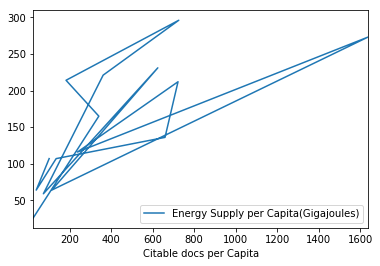

In [293]:
plot9() # Be sure to comment out plot9() before submitting the assignment!

### Question 10 (6.6%)
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [306]:
def answer_ten():
    Top15=answer_one()
    med=Top15['% Renewable'].median()
#     return med
    Top15['HighRenew']=None
    for i in range(len(Top15)):
        if Top15.iloc[i,9] > med:
            Top15.iloc[i,21] = 1
        else:
            Top15.iloc[i,21] = 0
    return pd.Series(Top15['HighRenew'])
answer_ten()

Country
India                 0
Germany               1
Russian Federation    0
Canada                1
South Korea           0
Brazil                1
Australia             0
Turkey                1
Norway                1
Malaysia              0
Sweden                1
Switzerland           1
Poland                0
Mexico                0
Ukraine               0
Name: HighRenew, dtype: int64

### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [347]:
def answer_eleven():
    ContinentDict  = {'Turkey':'Asia', 
                  'Norway':'North America', 
                  'Switzerland':'Asia', 
                  'Ukraine':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'Sweden':'Europe', 
                  'South Korea':'Asia', 
                  'Mexico':'Europe', 
                  'Malaysia':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America',
                      'Poland':'South America'
                   }
    Top15 = answer_one()
    Top15['size'] = None
    Top15['Pop'] = Top15['Energy Supply(Petajoules)']/Top15['Energy Supply per Capita(Gigajoules)']
    Top15['Continent'] = None
    for i in range(len(Top15)):

        Top15.iloc[i,21] = 1
        Top15.iloc[i,23]= ContinentDict[Top15.index[i]]
        
    ans = Top15.set_index('Continent').groupby(level=0)['Pop'].agg({'size': np.size, 'sum': np.sum, 'mean': np.mean,'std': np.std})
    ans = ans[['size','sum','mean','std']]
    return ans
answer_eleven()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


,size,sum,mean,std
Continent,,,,
Asia,4.0,1411.235648,352.808912,616.589312
Australia,1.0,23.316017,23.316017,NaN
Europe,6.0,432.364131,72.060688,53.501832
North America,2.0,40.324114,20.162057,21.323240
South America,2.0,244.429273,122.214636,118.370549


### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a __Series__ with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [358]:
def answer_twelve():
    Top15=answer_one()
    ContinentDict={'Turkey':'Asia', 
                  'Norway':'North America', 
                  'Switzerland':'Asia', 
                  'Ukraine':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'Sweden':'Europe', 
                  'South Korea':'Asia', 
                  'Mexico':'Europe', 
                  'Malaysia':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America',
                   'Poland':'South America'
                    }
    
    
    Top15['Continent'] = None
    for i in range(len(Top15)):
        Top15.iloc[i,21]= ContinentDict[Top15.index[i]]
    Top15['bins'] = pd.cut(Top15['% Renewable'],5)
    return Top15.groupby(['Continent','bins']).size()
answer_twelve()

Continent      bins            
Asia           (2.184, 21.351]     2
               (21.351, 40.422]    1
               (40.422, 59.493]    1
Australia      (2.184, 21.351]     1
Europe         (2.184, 21.351]     5
               (40.422, 59.493]    1
North America  (59.493, 78.564]    1
               (78.564, 97.636]    1
South America  (2.184, 21.351]     1
               (59.493, 78.564]    1
dtype: int64

### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [359]:
def answer_thirteen():
    Top15 = answer_one()
    Top15['Pop'] = (Top15['Energy Supply(Petajoules)']/Top15['Energy Supply per Capita(Gigajoules)']).astype(float)
    return Top15['Pop']
answer_thirteen()

Country
India                 1276.730769
Germany                 80.369697
Russian Federation     143.500000
Canada                  35.239865
South Korea             49.805430
Brazil                 205.915254
Australia               23.316017
Turkey                  76.515625
Norway                   5.084249
Malaysia                29.456897
Sweden                   9.641509
Switzerland              8.183824
Poland                  38.514019
Mexico                 124.125000
Ukraine                 45.271028
Name: Pop, dtype: float64

### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [0]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


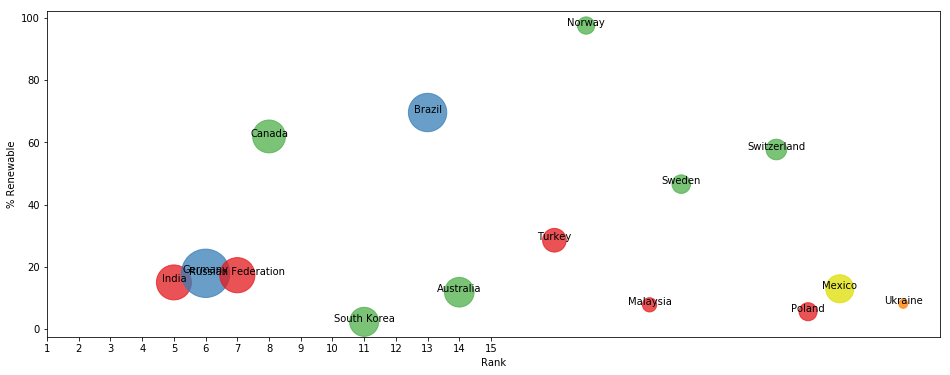

In [361]:
plot_optional() # Be sure to comment out plot_optional() before submitting the assignment!